In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/lenovo/Downloads/python-projectssuperstore-analysis/train.csv")



In [21]:
# Show the first few rows
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [23]:
# Get column names
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [25]:
# Check for missing values
print(df.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [27]:
# Summary statistics
print(df.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\2298081884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category"], y=df["Sales"], estimator=sum, palette="viridis")


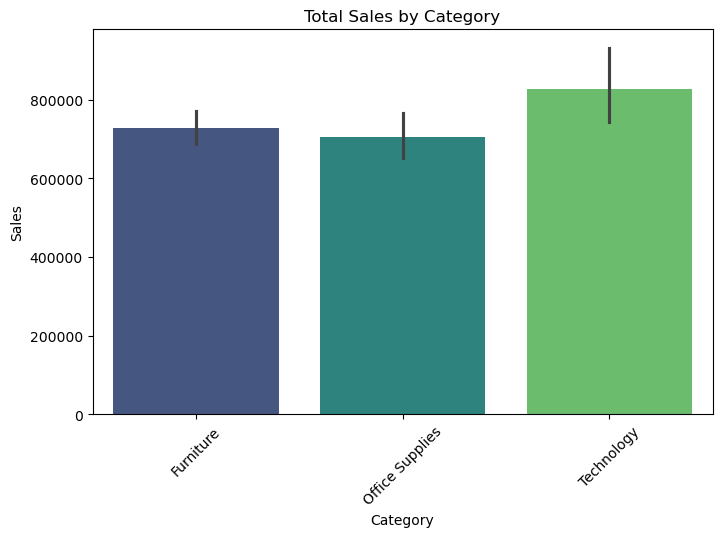

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=df["Category"], y=df["Sales"], estimator=sum, palette="viridis")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()


In [33]:
# Top 10 Customers by Sales
top_customers = df.groupby("Customer Name")["Sales"].sum().nlargest(10)
print(top_customers)



Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [35]:
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)
print(top_products)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\1658419972.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


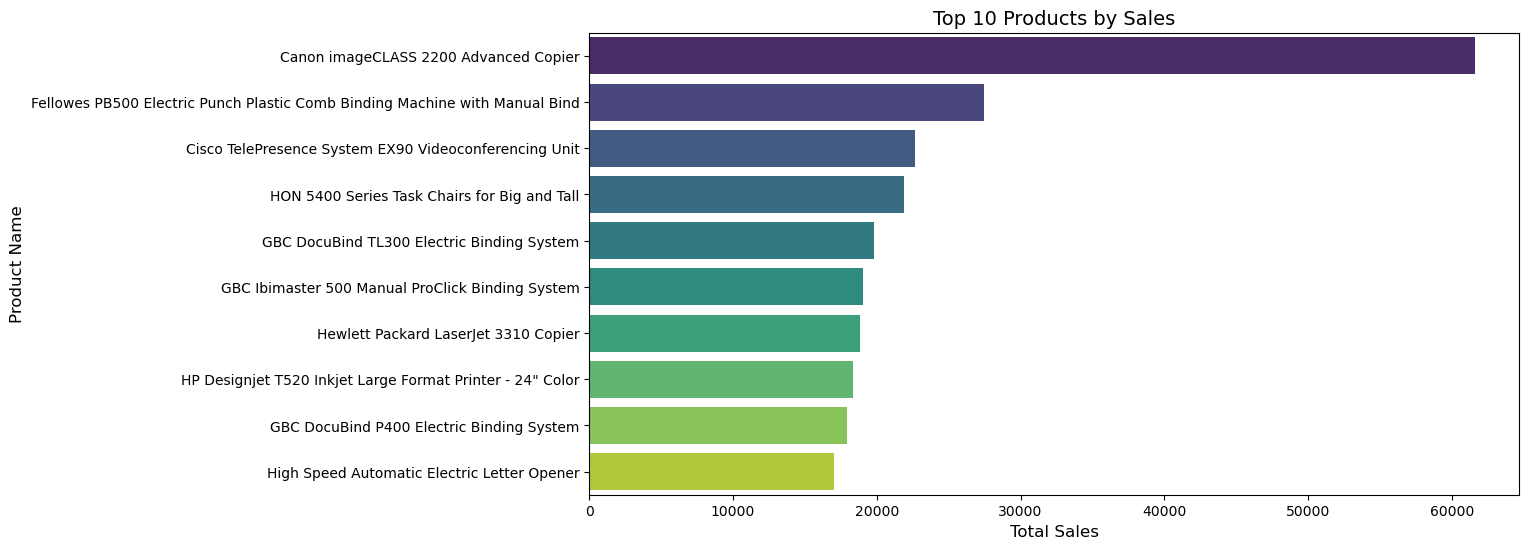

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 products by sales
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")

# Add labels and title
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Products by Sales", fontsize=14)
plt.show()



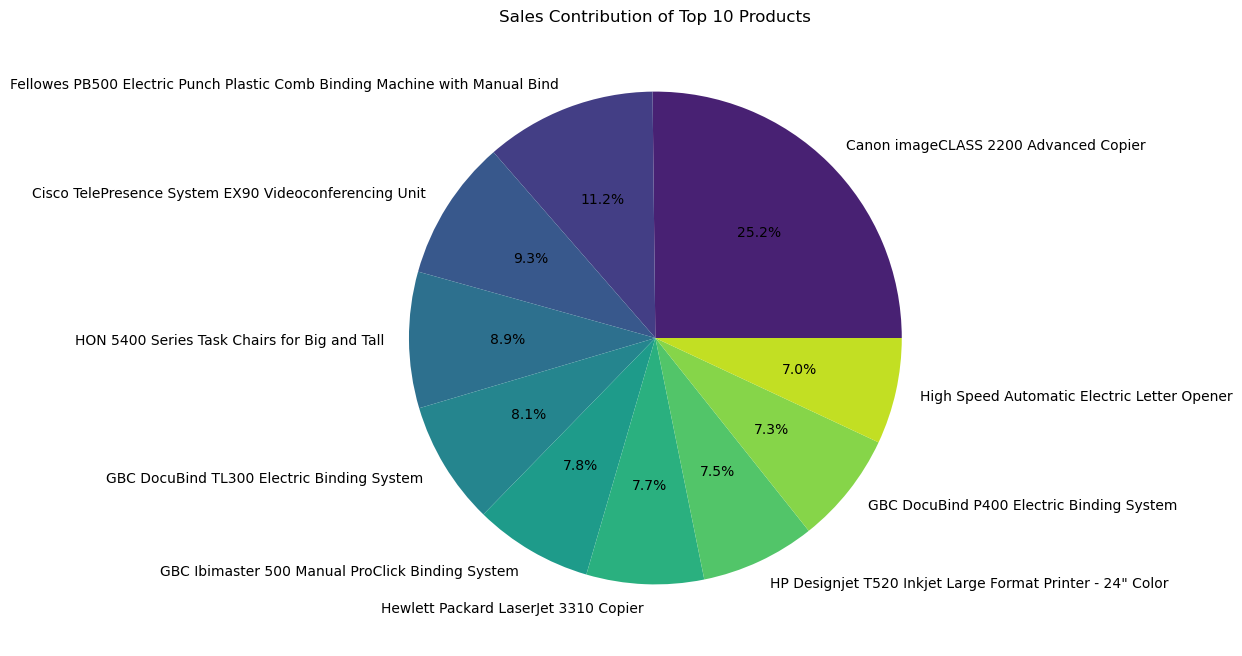

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", 10))
plt.title("Sales Contribution of Top 10 Products")
plt.show()


In [61]:
# Convert 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\3272504974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_products["Order Month"] = df_top_products["Order Date"].dt.to_period("M")


<Figure size 1200x600 with 0 Axes>

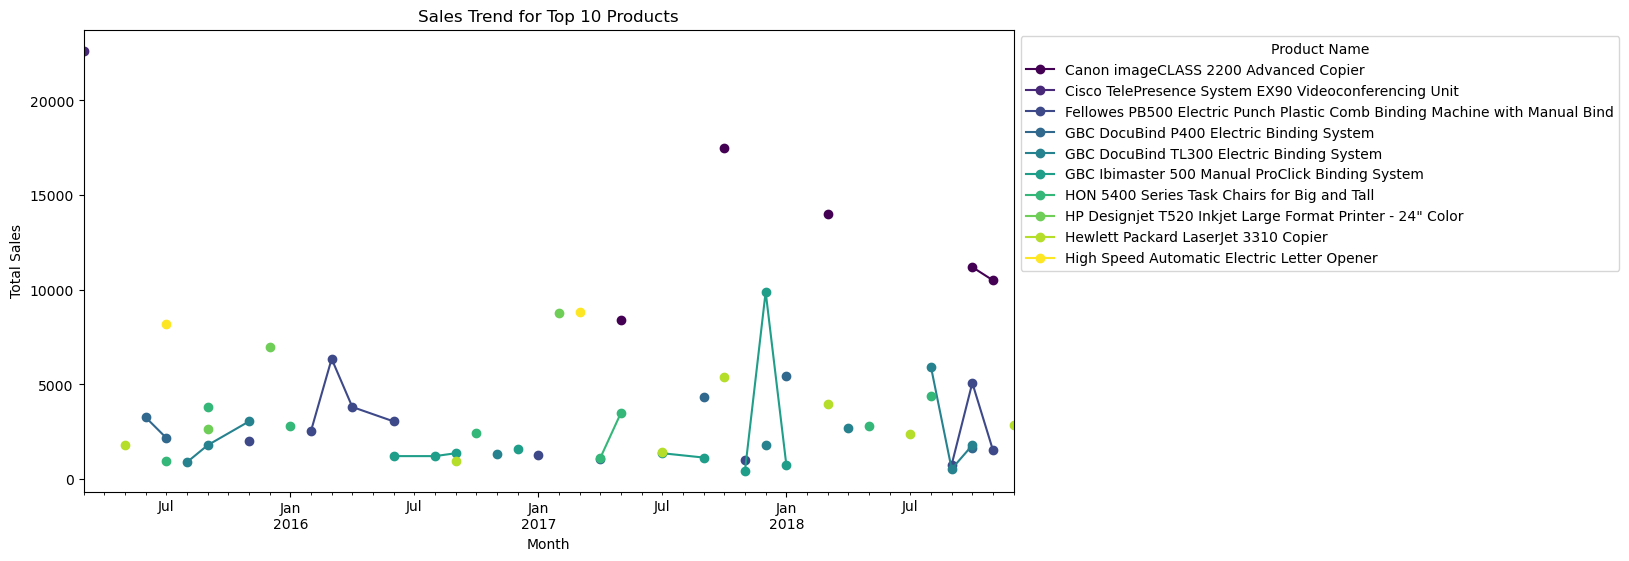

In [63]:
# Filter only top 10 products
top_products_list = top_products.index.tolist()
df_top_products = df[df["Product Name"].isin(top_products_list)]

# Aggregate sales by month
df_top_products["Order Month"] = df_top_products["Order Date"].dt.to_period("M")
monthly_sales = df_top_products.groupby(["Order Month", "Product Name"])["Sales"].sum().unstack()

# Plot trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", colormap="viridis", figsize=(12, 6))
plt.title("Sales Trend for Top 10 Products")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Product Name", bbox_to_anchor=(1, 1))
plt.show()


📌 1. Customer Analysis
✅ Customer Segmentation (RFM Analysis) → Identify high-value customers
✅ Churn Analysis → Find customers who stopped purchasing

📌 2. Sales & Market Trends
✅ Time-Series Forecasting → Predict future sales
✅ Regional Sales Performance → Identify best & worst-performing locations
✅ Product Performance Analysis → Find top-selling & low-performing products

📌 3. Shipping & Operational Analysis
✅ Delivery Delays → Identify late shipments
✅ Shipping Mode Efficiency → Which shipping method is the fastest?

📌 4. Market Basket Analysis
✅ Frequent Product Pairs → Which products are bought together?

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Compute RFM values
rfm = df.groupby("Customer ID").agg({
    "Order Date": lambda x: (df["Order Date"].max() - x.max()).days,  # Recency
    "Order ID": "count",  # Frequency
    "Sales": "sum"  # Monetary
}).rename(columns={"Order Date": "Recency", "Order ID": "Frequency", "Sales": "Monetary"})

# Normalize data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

print(rfm.head())


             Recency  Frequency  Monetary  Cluster
Customer ID                                       
AA-10315         184         11  5563.560        0
AA-10375          19         15  1056.390        3
AA-10480         259         12  1790.512        3
AA-10645          55         18  5086.935        0
AB-10015         415          6   886.156        1


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\911931455.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M", on="Order Date")["Sales"].sum()


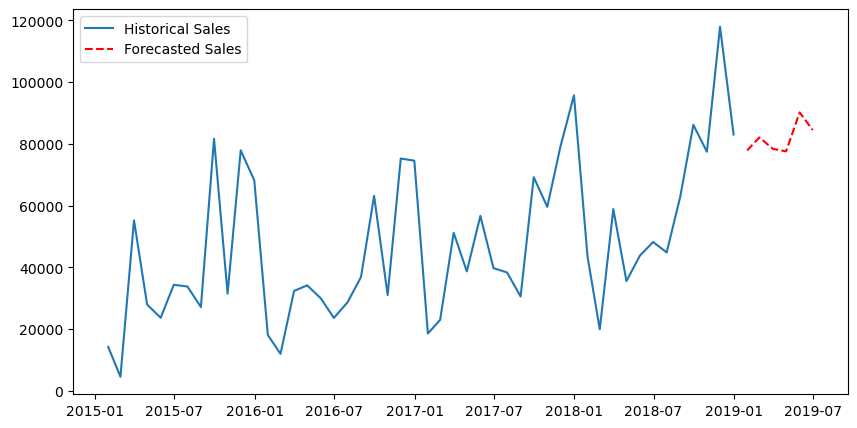

In [74]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Aggregate sales by month
monthly_sales = df.resample("M", on="Order Date")["Sales"].sum()

# Ensure the index is datetime
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Fit ARIMA Model
model = ARIMA(monthly_sales, order=(5,1,0))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label="Historical Sales")
plt.plot(forecast, label="Forecasted Sales", linestyle="dashed", color="red")
plt.legend()
plt.show()


✅ Best and worst-performing regions
✅ Sales trends by region
✅ Top cities contributing to sales

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\1396948166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


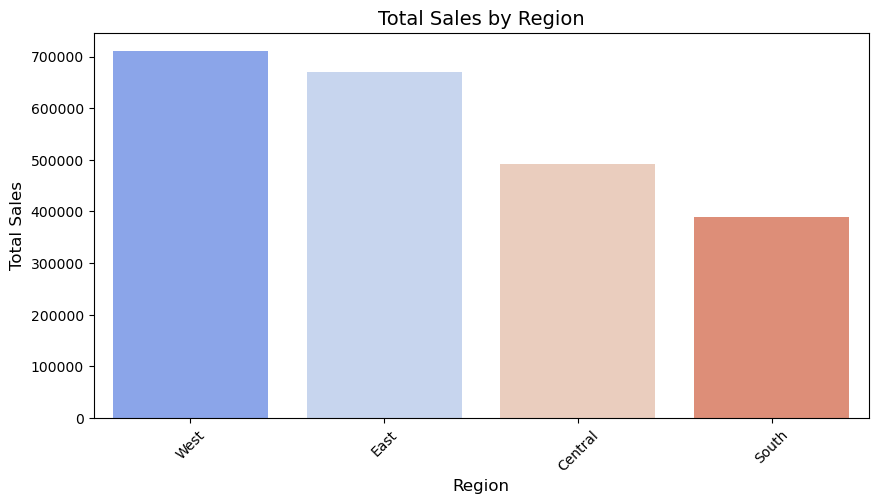

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group sales by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

# Plot sales per region
plt.figure(figsize=(10, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Region", fontsize=14)
plt.xticks(rotation=45)
plt.show()



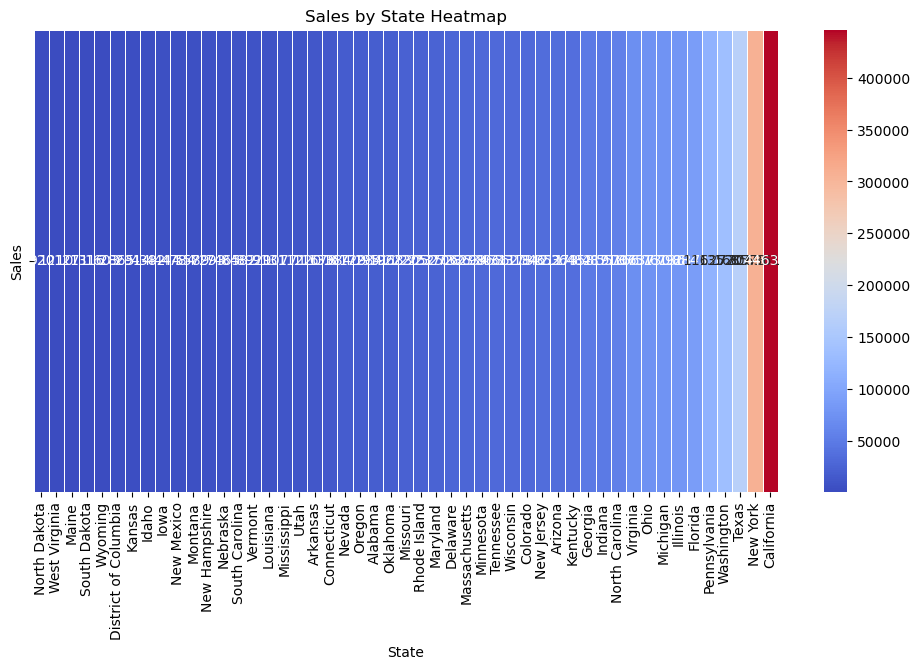

In [81]:
# Group sales by State
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(state_sales.to_frame().T, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales by State Heatmap")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\2294277149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")


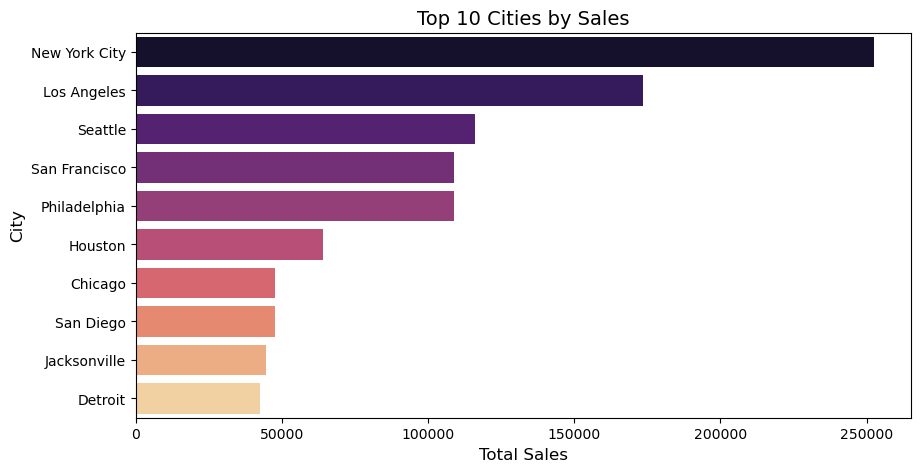

In [83]:
# Group sales by City
city_sales = df.groupby("City")["Sales"].sum().nlargest(10)

# Plot top 10 cities by sales
plt.figure(figsize=(10, 5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="magma")
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.title("Top 10 Cities by Sales", fontsize=14)
plt.show()


📌 Churn Analysis
Customer churn refers to customers who stop purchasing from the store.
We’ll identify:
✅ Inactive customers (who haven't ordered in a long time)
✅ High-risk churn customers (low frequency & low spending)



In [86]:
# Import required libraries
import datetime

# Define "churned" as customers who haven't purchased in the last 6 months
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
last_order_date = df["Order Date"].max()  # Most recent order date
six_months_ago = last_order_date - datetime.timedelta(days=180)

# Find churned customers
churned_customers = df.groupby("Customer ID").agg({
    "Order Date": "max",
    "Sales": "sum"
}).reset_index()

# Mark customers as churned if they haven't ordered in the last 6 months
churned_customers["Churned"] = churned_customers["Order Date"] < six_months_ago

# Display churned customers
print(churned_customers[churned_customers["Churned"] == True].head())


   Customer ID Order Date     Sales  Churned
0     AA-10315 2018-06-29  5563.560     True
2     AA-10480 2018-04-15  1790.512     True
4     AB-10015 2017-11-10   886.156     True
11    AC-10420 2018-05-12   925.800     True
14    AC-10660 2018-03-23   657.316     True


In [88]:
# Calculate churn rate
total_customers = df["Customer ID"].nunique()
churned_count = churned_customers["Churned"].sum()
churn_rate = (churned_count / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_count}")
print(f"Churn Rate: {churn_rate:.2f}%")


Total Customers: 793
Churned Customers: 202
Churn Rate: 25.47%


📌 Shipping Performance Analysis
Now, let's check:
✅ Shipping time & delays
✅ Which shipping method is the fastest?
✅ Which regions experience the most delays?

In [91]:
# Convert Ship Date to datetime
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

# Calculate shipping duration (days between order & shipment)
df["Shipping Duration"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Display shipping stats
print(df["Shipping Duration"].describe())


count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Duration, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\353475049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_performance.index, y=shipping_performance.values, palette="viridis")


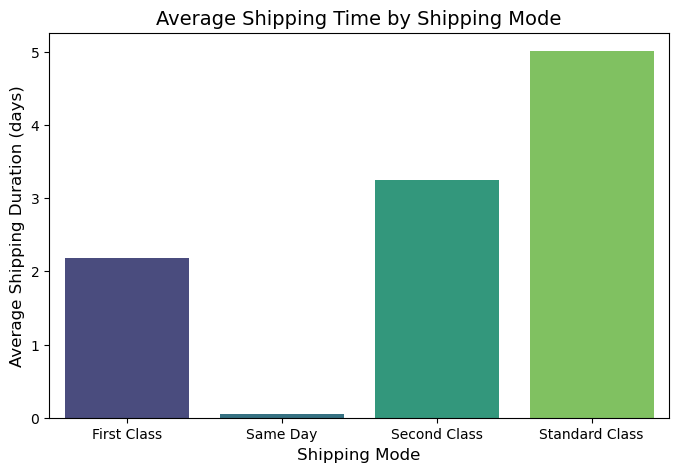

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average shipping duration by Ship Mode
shipping_performance = df.groupby("Ship Mode")["Shipping Duration"].mean()

# Plot shipping mode performance
plt.figure(figsize=(8, 5))
sns.barplot(x=shipping_performance.index, y=shipping_performance.values, palette="viridis")
plt.xlabel("Shipping Mode", fontsize=12)
plt.ylabel("Average Shipping Duration (days)", fontsize=12)
plt.title("Average Shipping Time by Shipping Mode", fontsize=14)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\1975327212.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_shipments_region.index, y=late_shipments_region.values, palette="Reds")


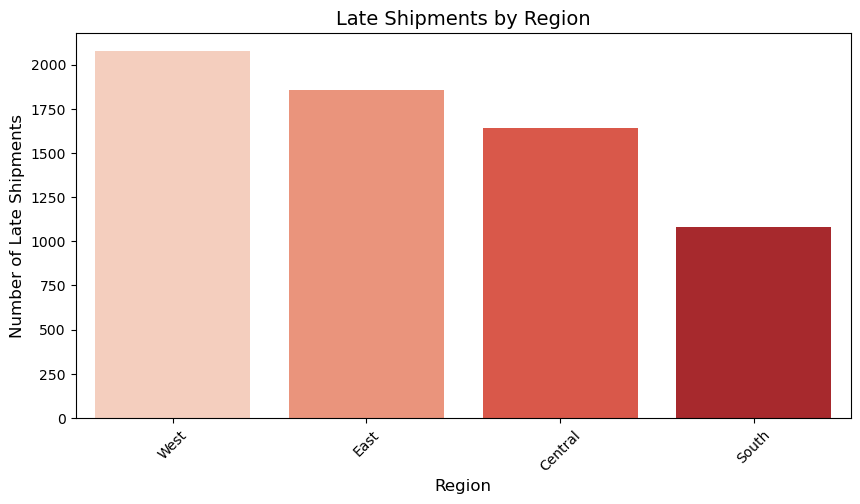

In [95]:
# Find late shipments (delivered more than the average shipping time)
average_shipping_time = df["Shipping Duration"].mean()
late_shipments = df[df["Shipping Duration"] > average_shipping_time]

# Count late shipments by region
late_shipments_region = late_shipments["Region"].value_counts()

# Plot late shipments by region
plt.figure(figsize=(10, 5))
sns.barplot(x=late_shipments_region.index, y=late_shipments_region.values, palette="Reds")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Late Shipments", fontsize=12)
plt.title("Late Shipments by Region", fontsize=14)
plt.xticks(rotation=45)
plt.show()


✅ Customer churn behavior (Are some customers inactive?)
✅ Shipping duration impact (Do late deliveries affect sales?)
✅ Segment-wise shipping trends (Which customer segments face delays?)

In [132]:
from datetime import datetime

# Convert 'Order Date' to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Find last purchase date per customer
last_purchase = df.groupby("Customer ID")["Order Date"].max()

# Define churn threshold (6 months before the latest order date)
churn_threshold = df["Order Date"].max() - pd.DateOffset(months=6)

# Identify churned customers
churned_customers = last_purchase[last_purchase < churn_threshold]

# Print number of churned customers
print(f"Total churned customers: {len(churned_customers)}")


Total churned customers: 199


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\877555299.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Shipping Duration"], y=df["Sales"], palette="coolwarm")


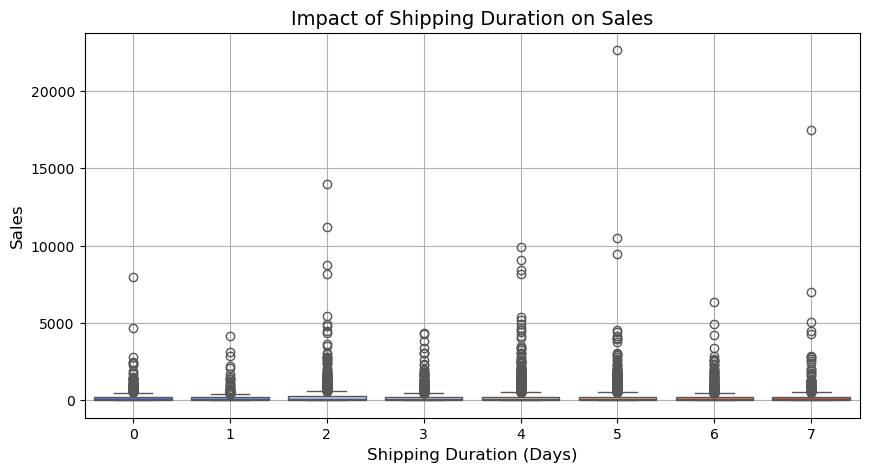

In [134]:
# Convert 'Ship Date' to datetime
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True)

# Calculate Shipping Duration
df["Shipping Duration"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Plot sales vs. shipping duration
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Shipping Duration"], y=df["Sales"], palette="coolwarm")
plt.xlabel("Shipping Duration (Days)", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Impact of Shipping Duration on Sales", fontsize=14)
plt.grid(True)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13812\3975644995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_shipping.index, y=segment_shipping.values, palette="viridis")


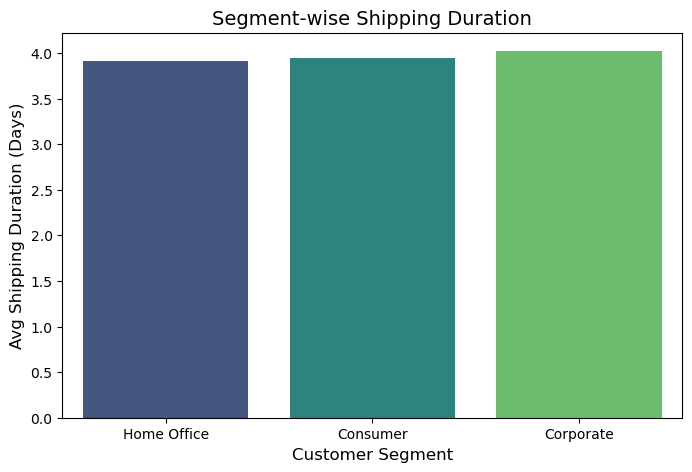

In [136]:
# Average shipping duration per customer segment
segment_shipping = df.groupby("Segment")["Shipping Duration"].mean().sort_values()

# Plot segment-wise shipping duration
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_shipping.index, y=segment_shipping.values, palette="viridis")
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Avg Shipping Duration (Days)", fontsize=12)
plt.title("Segment-wise Shipping Duration", fontsize=14)
plt.show()
